<a href="https://colab.research.google.com/github/PinKem253/Classification_model_comparison_project/blob/main/classification_model_comparison_for_iotid20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Project Report: Classification Model Comparison for Iotid20 dataset*


> ***Author: Nguyen Huy Hoang***

# ***1. Introduction***

* *This report details the process of training and evaluating multiple classification models on the given dataset. The models compared include K-Nearest Neighbors (KNN), Decision Tree Classifier, and Random Forest Classifier based on different criterias or metrics (accuracy,precision,recall,f1) with the aim of reaching highest performance*

# ***2. Importing dataset and necessary library***

In [1]:

!pip install opendatasets
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/rohulaminlabid/iotid20-dataset?select=IoT+Network+Intrusion+Dataset.csv"
)

#240dcb553842396586146470f26b1cc1


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: PinKem
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rohulaminlabid/iotid20-dataset


100%|██████████| 53.1M/53.1M [00:00<00:00, 91.5MB/s]


In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('/content/iotid20-dataset/IoT Network Intrusion Dataset.csv')
#data = pd.read_csv('/kaggle/input/iotid20-dataset/IoT Network Intrusion Dataset.csv')
df = data.copy()

df.head()



,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


# ***3. Data Preprocessing***

# **Data Exploration**

*This process includes handling missing values as well as inf values,dropping duplicates and garbage values,encoding target column,resampling data,scaling data and finally plotting a data distribution*

> *Checking data information*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

> *Filtering categorical columns and numerical_columns*

In [5]:

cate_col = [col for col in df.columns if df[col].dtype=='object']

num_col = [col for col in df.columns if df[col].dtype!='object']

print(cate_col)

print(len(cate_col))

print(num_col)

print(len(num_col))

['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Label', 'Cat', 'Sub_Cat']
7
['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_S

> *Handling missing values -> it turns out this dataset has no missing values*

In [6]:
df.isnull().any().sum()
df[df.isnull().any(axis=1)]

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat


> *drop all duplicates existed in data*

In [7]:
#df.duplicated().sum()
df.drop_duplicates().reset_index(drop=True,inplace =True)

In [8]:
#remove all categorical columns excluding target column
remove_list =[str(x) for x in cate_col if x!='Cat']
df.drop(columns=remove_list,inplace=True)

#dropping column that contains full value of -1
df.drop(columns='Init_Fwd_Win_Byts',inplace = True)

#drop na and handling inf values
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.dropna(inplace=True)

mean_value = df[df['Init_Bwd_Win_Byts'] != -1]['Init_Bwd_Win_Byts'].mean()
df.replace(-1,mean_value,inplace=True)










In [9]:
df['Cat'].describe().T

,Cat
count,625415
unique,5
top,Mirai
freq,415309


# **Data Distribution Visualization**

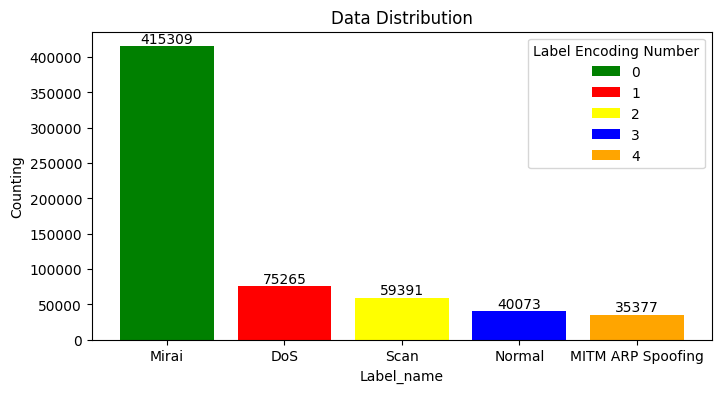

In [10]:
target_label = [str(x) for x in df['Cat'].unique()]

values = df['Cat'].value_counts()

plt.figure(figsize=(8,4))

val_list = {

    'DoS': values['DoS'],

    'MITM ARP Spoofing': values['MITM ARP Spoofing'],

    'Mirai': values['Mirai'],

    'Normal': values['Normal'],

    'Scan': values['Scan']

}

colors ={
    'DoS': 'green',

    'MITM ARP Spoofing': 'red',

    'Mirai': 'yellow',

    'Normal': 'blue',

    'Scan': 'orange'

}



labeled_num ={

    'DoS': 0, 'MITM ARP Spoofing': 1, 'Mirai': 2, 'Normal': 3, 'Scan': 4

}



bars = plt.bar(target_label,values, align='center',label = labeled_num.values(),color = colors.values())

plt.title('Data Distribution')

plt.xlabel('Label_name')

plt.ylabel('Counting')

for bar,value in zip(bars,values):

      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.legend(title='Label Encoding Number')

plt.savefig('distribution_plot.png',format='png',dpi=300)

plt.show()




In [11]:
#create a dataset with onehot encoding for neural network
nn_df = df.copy()
nn_df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Mirai
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,DoS
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Scan
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Mirai
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Mirai


> ***This is an imbalanced dataset***

# **Label Encoding**

In [12]:
label_num ={

    'Mirai': 0,

    'DoS': 1,

    'Scan':2,

    'Normal':3,

    'MITM ARP Spoofing':4

}
df['labeled_cat'] = df['Cat'].map(lambda x: label_num[x])
df

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,labeled_cat
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Mirai,0
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,DoS,1
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Scan,2
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Mirai,0
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Mirai,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,56112,8043,17,277,1,1,18.0,18.0,18.0,18.0,...,0.0,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Mirai,0
625779,4570,554,6,1658,0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,DoS,1
625780,52739,9020,6,77,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Scan,2
625781,9020,49784,6,240,2,1,2776.0,1388.0,1388.0,1388.0,...,0.0,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,3


# **Correlation Between Features and Target Visualization**

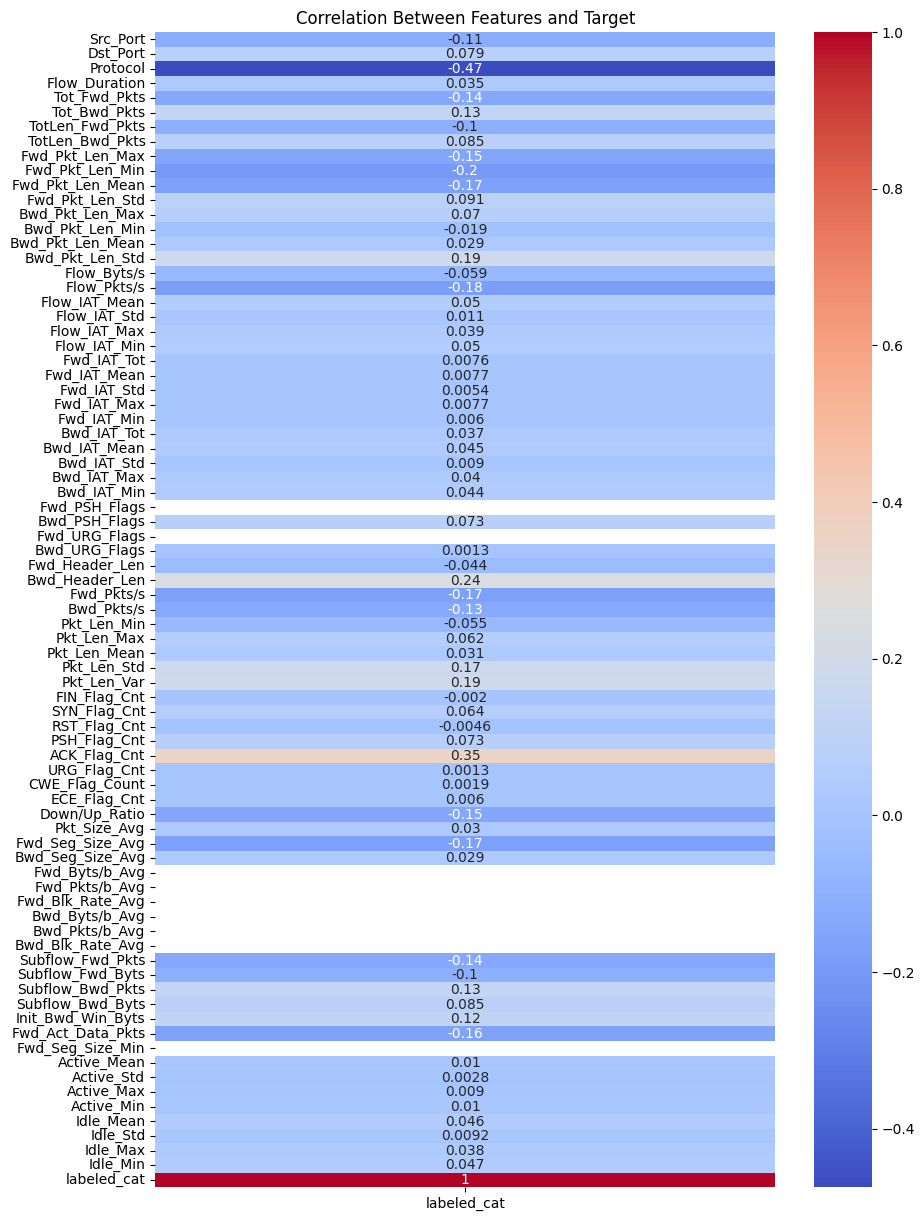

In [13]:
corr_df=df.corr(numeric_only=True)['labeled_cat']
corr_df
corr_df.to_csv('corr_df.csv',index=True)
corr_df = corr_df.to_frame()
plt.figure(figsize=(10,15))
sns.heatmap(corr_df,annot=True,cmap='coolwarm')
plt.title("Correlation Between Features and Target")
plt.show()

> ***There are several columns that don't have large contribution(or even 0) to target column,so I decided to remove them,with the range (1e-2,1e2)***

In [14]:
remove_val = corr_df[(abs(corr_df['labeled_cat']) <= 0.01)]
remove_val =list(remove_val.index)
#print(remove_val)

na_val = corr_df[corr_df['labeled_cat'].isnull()]
na_val = list(na_val.index)

#remove
df.drop(columns=remove_val,inplace=True)
df.drop(columns=na_val,inplace=True)


In [15]:
df.shape

(625415, 56)

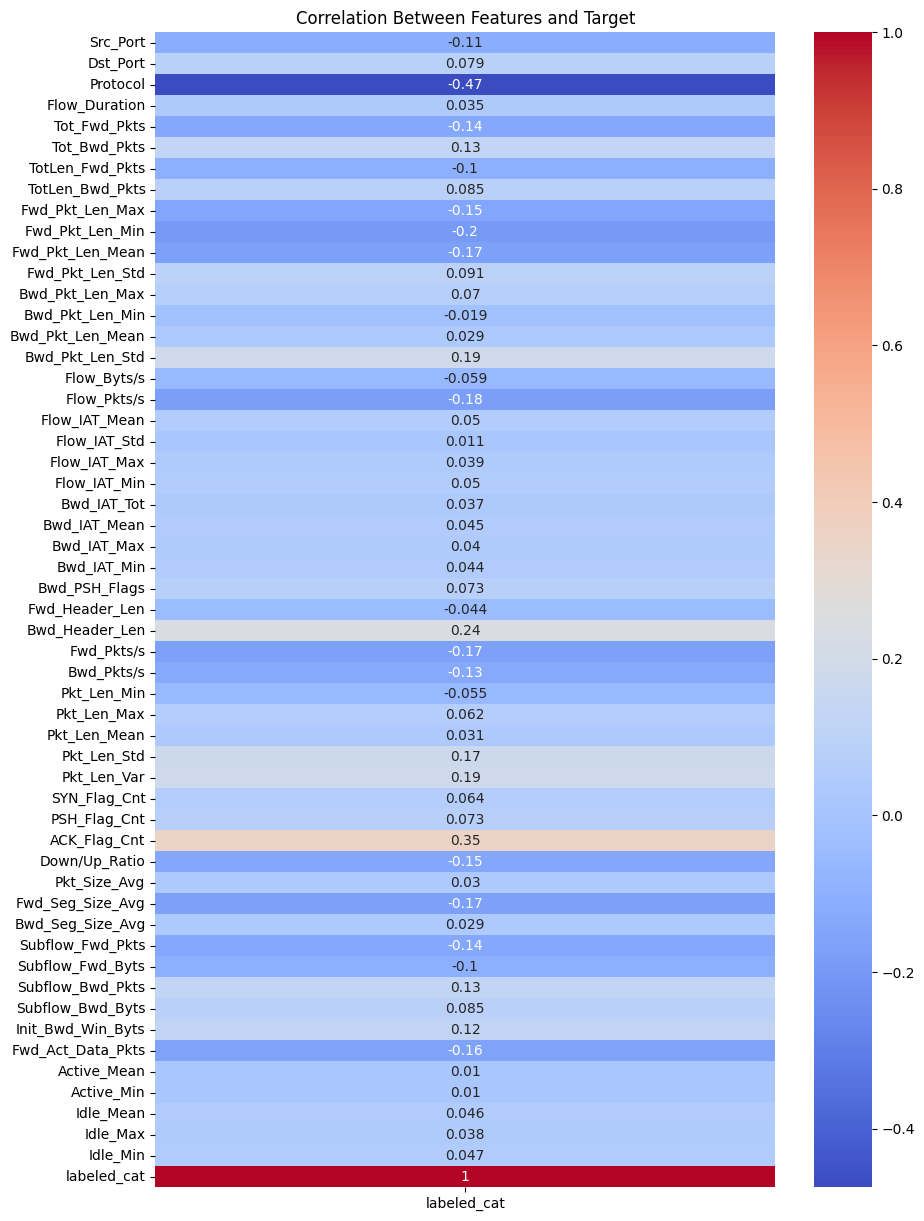

In [16]:
corr_df=df.corr(numeric_only=True)['labeled_cat']
corr_df
corr_df.to_csv('corr_df.csv',index=True)
corr_df = corr_df.to_frame()
plt.figure(figsize=(10,15))
sns.heatmap(corr_df,annot=True,cmap='coolwarm')
plt.title("Correlation Between Features and Target")
plt.show()

In [17]:
df.to_csv('cleaned_data.csv',index=False)

# **Resampling Data**

In [18]:
X = df.drop(columns=['labeled_cat','Cat'],axis=1)
y = df['labeled_cat']

X

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Min,Idle_Mean,Idle_Max,Idle_Min
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,982,1,1430,9434.832622,1,0.0,0.0,75.0,75.0,75.0
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0,2,0,14600.000000,0,0.0,0.0,2655.0,4254.0,1056.0
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0,3,2806,1869.000000,0,0.0,0.0,70.5,71.0,70.0
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0,2,2776,1869.000000,0,0.0,0.0,151.0,151.0,151.0
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,886,1,420,9434.832622,2,0.0,0.0,76.5,77.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,56112,8043,17,277,1,1,18.0,18.0,18.0,18.0,...,18,1,18,9434.832622,1,0.0,0.0,277.0,277.0,277.0
625779,4570,554,6,1658,0,2,0.0,0.0,0.0,0.0,...,0,2,0,14600.000000,0,0.0,0.0,1658.0,1658.0,1658.0
625780,52739,9020,6,77,1,1,0.0,0.0,0.0,0.0,...,0,1,0,32679.000000,0,0.0,0.0,77.0,77.0,77.0
625781,9020,49784,6,240,2,1,2776.0,1388.0,1388.0,1388.0,...,2776,1,1388,1869.000000,2,0.0,0.0,120.0,125.0,115.0


In [19]:
!pip install imblearn

In [20]:
X.shape,y.shape

((625415, 54), (625415,))

> *Seperating data into train and test and valid

In [21]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)


In [22]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(500332, 54) (500332,)
(125083, 54) (125083,)


> *Using smote to handle imbalanced dataset*

In [23]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

from collections import Counter



smote = SMOTE(random_state=0)

print(Counter(y_train))

X_train,y_train=smote.fit_resample(X_train,y_train)

print(Counter(y_train))






Counter({0: 332073, 2: 60168, 1: 47634, 3: 32164, 4: 28293})
Counter({2: 332073, 0: 332073, 1: 332073, 4: 332073, 3: 332073})


# **Scaling Data**

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)






# ***Building a neural network using Pytorch***

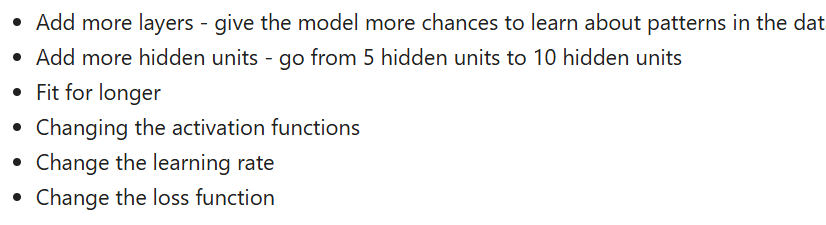

# Transforming data into tensor form

In [25]:
type(X_train), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

In [26]:
import torch
#X_train = X_train.to_numpy()
y_train= y_train.to_numpy()

In [27]:
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

In [28]:
type(X_test),type(y_test)

(numpy.ndarray, pandas.core.series.Series)

In [29]:
X_test = torch.from_numpy(X_test).type(torch.float)

In [30]:
y_test = y_test.to_numpy()
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

#Create Dataset

In [31]:
train_dataset = torch.utils.data.TensorDataset(X_train,y_train)
test_dataset= torch.utils.data.TensorDataset(X_test,y_test)

In [32]:
check = next(iter(train_dataset))
check

(tensor([ 1.0204, -0.4266, -0.2915, -0.2148,  0.3934, -0.4362, -0.3238, -0.4573,
         -0.5122, -0.4364, -0.5012, -0.2366, -0.9650, -0.7930, -0.9229, -0.3426,
         -0.6950, -0.1011, -0.3189, -0.0740, -0.2495, -0.3186, -0.2389, -0.2893,
         -0.2573, -0.2853, -0.1681,  1.0897, -0.2527, -0.0472, -0.1856, -0.6805,
         -0.9807, -0.9435, -0.4865, -0.4622, -0.4922, -0.1681,  0.7294, -0.5695,
         -0.9372, -0.5012, -0.9229,  0.3934, -0.3238, -0.4362, -0.4573,  1.7850,
         -0.2698, -0.0833, -0.0815, -0.3003, -0.2474, -0.3039]),
 tensor(2))

In [33]:
y_train[0]

tensor(2)

# Create Train and Test DataLoaders

In [34]:
from torch.utils.data import DataLoader
import os
NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 32


train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size= BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True,
                              pin_memory=True
                              )

test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size = BATCH_SIZE,
                              num_workers = NUM_WORKERS,
                              pin_memory=True
                              )

In [35]:
X_train.shape,y_train.shape

(torch.Size([1660365, 54]), torch.Size([1660365]))

In [36]:
num_classes=len(torch.unique(y_train))
num_classes

5

In [37]:
X_train.shape[1]

54

In [38]:
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#Simple Baseline Model

In [39]:
import torch
from torch import nn

class ClassificationModel(nn.Module):
  def __init__(self,input_shape,output_shape,hidden_layers):
    super().__init__()
    self.input_shape = input_shape
    self.output_shape = output_shape
    self.hidden_layers = hidden_layers


    self.block_1 = nn.Sequential(
        nn.Linear(in_features=input_shape,out_features=hidden_layers),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layers,out_features=hidden_layers),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layers,out_features=output_shape),
    )


  def forward(self,x):
    return self.block_1(x);


In [40]:
model = ClassificationModel(input_shape=X_train.shape[1],
                            output_shape=num_classes,
                            hidden_layers = 10,
                            ).to(device)

In [41]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

In [42]:
summary(model=model,input_size=[32,54])

Layer (type:depth-idx)                   Output Shape              Param #
ClassificationModel                      [32, 5]                   --
├─Sequential: 1-1                        [32, 5]                   --
│    └─Linear: 2-1                       [32, 10]                  550
│    └─ReLU: 2-2                         [32, 10]                  --
│    └─Linear: 2-3                       [32, 10]                  110
│    └─ReLU: 2-4                         [32, 10]                  --
│    └─Linear: 2-5                       [32, 5]                   55
Total params: 715
Trainable params: 715
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.02

In [43]:
try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 21.3 MB/s eta 0:00:00


#Create train,test step and import evaluation metric

In [44]:
def accuracy(y_pred,y_true,num_classes,device):
  acc = Accuracy(task="multiclass",num_classes=num_classes).to(device)
  return acc(y_pred,y_true)


In [47]:
from tqdm.auto import tqdm
from timeit import default_timer as timer


def train_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               num_classes:int,
               device:torch.device
               ):
  model.train()
  train_loss,train_acc = 0,0
  for batch,(X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss+=loss.item()


    y_pred_label = torch.argmax(y_pred,dim=1)
    acc=accuracy(y_pred_label,y,num_classes,device)
    train_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_acc,train_loss



def test_step(model:torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              num_classes:int,
              device: torch.device
              ):
  model.eval()
  test_loss,test_acc =0,0
  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):
      X,y = X.to(device),y.to(device)
      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc+= accuracy(test_pred_labels,y,num_classes,device)

    test_loss/=len(dataloader)
    test_acc /= len(dataloader)

  return test_acc,test_loss

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn :torch.nn.Module,
          num_classes:int,
          epochs:int,
          device:torch.device,
          ):

  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": [],
      "epochs":[],
      "time":[],
  }

  for epoch in tqdm(range(epochs+1)):
    start_time = timer()
    train_acc,train_loss = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn = loss_fn,
                                      optimizer=optimizer,
                                      num_classes = num_classes,
                                      device = device,
                                      )

    test_acc,test_loss = test_step(model=model,
                                  dataloader = test_dataloader,
                                  loss_fn = loss_fn,
                                  optimizer=optimizer,
                                  num_classes = num_classes,
                                  device = device
                                  )
    if(epoch%10==0):
      print('-'*100)
      print(f"Epochs: {epoch}")
      print(f"train acc: {train_acc} | loss train: {train_loss} | test acc: {test_acc} | test loss: {test_loss}")
      end_time=timer()

      results["time"].append(start_time-end_time)
      results["epochs"].append(epoch)
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  return results

In [48]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

In [49]:
epochs =100
device = "cuda" if torch.cuda.is_available() else "cpu"
history = train(model=model,
            train_dataloader=train_dataloader,
            test_dataloader=test_dataloader,
            optimizer=optimizer,
            loss_fn=loss_fn,
            epochs = epochs,
            num_classes=num_classes,
            device = device
            )


  0%|          | 0/101 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Epochs: 0
train acc: 0.8385738134384155 | loss train: 0.4216731908132436 | test acc: 0.8199353218078613 | test loss: 0.46876739273617324


Exception in thread Thread-31 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 541, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.10/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3

KeyboardInterrupt: 

#Plotting Accuracy and Loss Curves

In [ ]:
import matplotlib.pyplot as plt

def tracking_plot(results):
  epochs = results["epochs"]
  train_acc = results["train_acc"]
  test_acc = results["test_acc"]
  train_loss = results["train_loss"]
  test_loss = results["test_loss"]

  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
  ax1.plot(epochs,train_acc,label="Train accuracy",c="orange")
  ax1.plot(epochs,test_acc,label="Test accuracy",c="green")
  ax1.set(title="Model Accuracy",xlabel="Epochs",ylabel="Accuracy")
  plt.legend(loc="best")
  plt.grid(True)

  ax2.plot(epochs,train_loss,label="Train loss",c="orange")
  ax2.plot(epochs,test_loss,label="Test loss",c="green")
  ax2.set(title="Model Loss",xlabel="Epochs",ylabel="Loss")
  plt.legend(loc="best")
  plt.grid(True)

  plt.show()
tracking_plot(history)

# **Deep Neural Network Model USING KERAS**

In [ ]:
import tensorflow as tf
nn_df.drop(columns =remove_val,inplace=True)
nn_df.drop(columns=na_val,inplace=True)

nn_df = pd.get_dummies(nn_df,columns=['Cat'])
nn_df.head()


,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Mean,Active_Min,Idle_Mean,Idle_Max,Idle_Min,Cat_DoS,Cat_MITM ARP Spoofing,Cat_Mirai,Cat_Normal,Cat_Scan
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0.0,0.0,75.0,75.0,75.0,False,False,True,False,False
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,2655.0,4254.0,1056.0,True,False,False,False,False
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0.0,0.0,70.5,71.0,70.0,False,False,False,False,True
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0.0,0.0,151.0,151.0,151.0,False,False,True,False,False
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0.0,0.0,76.5,77.0,76.0,False,False,True,False,False


In [ ]:
X = nn_df.iloc[:,:-5]
y = nn_df.iloc[:,-5:]

y


,Cat_DoS,Cat_MITM ARP Spoofing,Cat_Mirai,Cat_Normal,Cat_Scan
0,False,False,True,False,False
1,True,False,False,False,False
2,False,False,False,False,True
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
625778,False,False,True,False,False
625779,True,False,False,False,False
625780,False,False,False,False,True
625781,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_testvalid,y_train,y_testvalid = train_test_split(X,y,test_size=0.4,random_state=0)
X_val,X_test,y_val,y_test = train_test_split(X_testvalid,y_testvalid,test_size=0.5,random_state=0)



In [ ]:
!pip install imblearn


In [ ]:
X_train.shape

(375249, 54)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

from collections import Counter


smote = SMOTE(random_state=0)
#return the counting of each features
print(Counter(y_train.idxmax(axis=1)))

X_train,y_train = smote.fit_resample(X_train,y_train.idxmax(axis=1))
print(Counter(y_train))


Counter({'Cat_Mirai': 249126, 'Cat_Scan': 45086, 'Cat_DoS': 35619, 'Cat_Normal': 24235, 'Cat_MITM ARP Spoofing': 21183})
Counter({'Cat_Mirai': 249126, 'Cat_DoS': 249126, 'Cat_Scan': 249126, 'Cat_Normal': 249126, 'Cat_MITM ARP Spoofing': 249126})


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test= scaler.transform(X_test)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

encoder = LabelEncoder()

encoder.fit(y_train)

y_train = encoder.transform(y_train)

y_train =  to_categorical(y_train,num_classes=5)
y_train



array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
'''
model = Sequential([
    Dense(64,activation = 'relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(5,activation='softmax')

])
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

training = model.fit(X_train,y_train,epochs =25,batch_size=25,validation_data=(X_val,y_val),verbose=True)

y_pred = model.predict(X_test)
'''


"\nmodel = Sequential([\n    Dense(64,activation = 'relu',input_shape=(X_train.shape[1],)),\n    Dense(32,activation='relu'),\n    Dense(5,activation='softmax')\n\n])\nmodel.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])\n\ntraining = model.fit(X_train,y_train,epochs =25,batch_size=25,validation_data=(X_val,y_val),verbose=True)\n\ny_pred = model.predict(X_test)\n"

In [ ]:
#convert into 1d array
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)))


NameError: name 'y_pred' is not defined

In [ ]:
loss_test,accuracy_test = model.evaluate(X_test,y_test,verbose=True)

In [ ]:
def accuracy_plot(fitted_model,accuracy_test):
       plt.figure(figsize=(12, 6))
       plt.plot(fitted_model.history['accuracy'],)
       plt.plot(fitted_model.history['val_accuracy'])
       plt.plot([accuracy_test] * len(fitted_model.history['accuracy']), linestyle='--', label='Test Accuracy')
       plt.title('Model Accuracy')
       plt.ylabel('Accuracy')
       plt.xlabel('Epoch')
       plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
       plt.show()

def loss_plot(fitted_model,loss_test):
       plt.figure(figsize=(12, 6))
       plt.plot(fitted_model.history['loss'])
       plt.plot(fitted_model.history['val_loss'])
       plt.plot([loss_test] * len(fitted_model.history['loss']), linestyle='--', label='Test Loss')
       plt.title('Model Loss')
       plt.ylabel('Loss')
       plt.xlabel('Epoch')
       plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
       plt.show()


In [ ]:
accuracy_plot(training,accuracy_test)
loss_plot(training,loss_test)

# **Convolution Neural Network**

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

model = Sequential([
    tf.keras.layers.Conv1D(filters=64,kernel_size=(3,),activation='relu',input_shape=(X_train.shape[1],1),padding='valid'),
    tf.keras.layers.MaxPooling1D(pool_size=(2,),strides=2,padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
training=model.fit(X_train,y_train,epochs=15,batch_size=25,validation_data=(X_val,y_val),verbose=True)

y_pred = model.predict(X_test)

Epoch 1/15
49826/49826 ━━━━━━━━━━━━━━━━━━━━ 106s 2ms/step - accuracy: 0.8465 - loss: 0.3885 - val_accuracy: 0.9030 - val_loss: 0.2608
Epoch 2/15
49826/49826 ━━━━━━━━━━━━━━━━━━━━ 139s 2ms/step - accuracy: 0.9536 - loss: 0.1587 - val_accuracy: 0.9114 - val_loss: 0.2644
Epoch 3/15
49826/49826 ━━━━━━━━━━━━━━━━━━━━ 100s 2ms/step - accuracy: 0.9576 - loss: 0.1343 - val_accuracy: 0.9119 - val_loss: 0.2107
Epoch 4/15
49826/49826 ━━━━━━━━━━━━━━━━━━━━ 104s 2ms/step - accuracy: 0.9586 - loss: 0.1293 - val_accuracy: 0.9158 - val_loss: 0.2051
Epoch 5/15
49826/49826 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - accuracy: 0.9605 - loss: 0.1243 - val_accuracy: 0.9212 - val_loss: 0.1782
Epoch 6/15
49826/49826 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - accuracy: 0.9533 - loss: 0.1554 - val_accuracy: 0.9163 - val_loss: 0.2250
Epoch 7/15
49826/49826 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - accuracy: 0.9592 - loss: 0.1339 - val_accuracy: 0.9183 - val_loss: 0.2289
Epoch 8/15
49826/49826 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - ac

In [ ]:
y_pred = model.predict(X_test)

3909/3909 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [ ]:
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11934
           1       0.53      0.97      0.68      7105
           2       1.00      0.91      0.95     82949
           3       0.98      0.98      0.98      7921
           4       0.90      0.95      0.93     15174

    accuracy                           0.93    125083
   macro avg       0.88      0.96      0.91    125083
weighted avg       0.96      0.93      0.94    125083



In [ ]:
print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


3909/3909 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9336 - loss: 0.1818


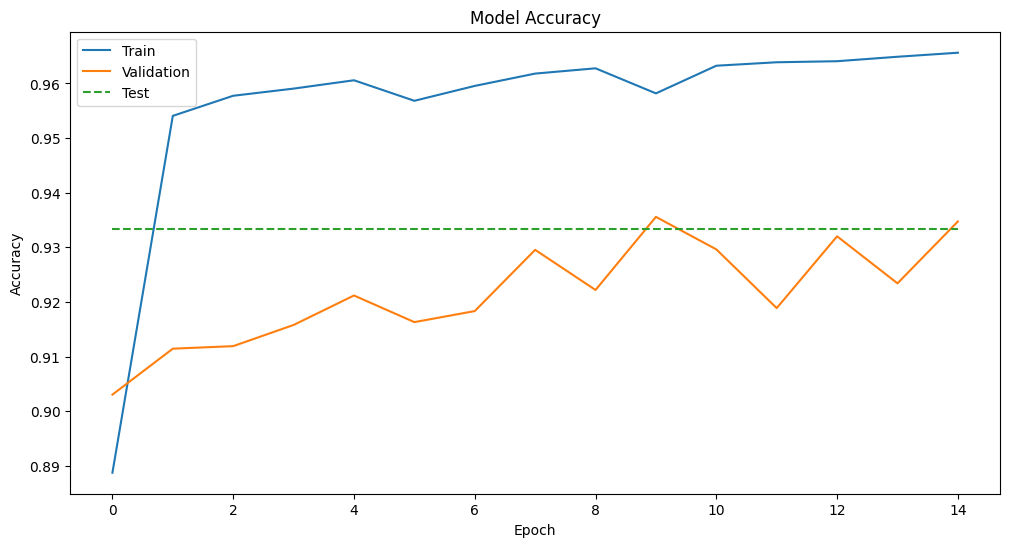

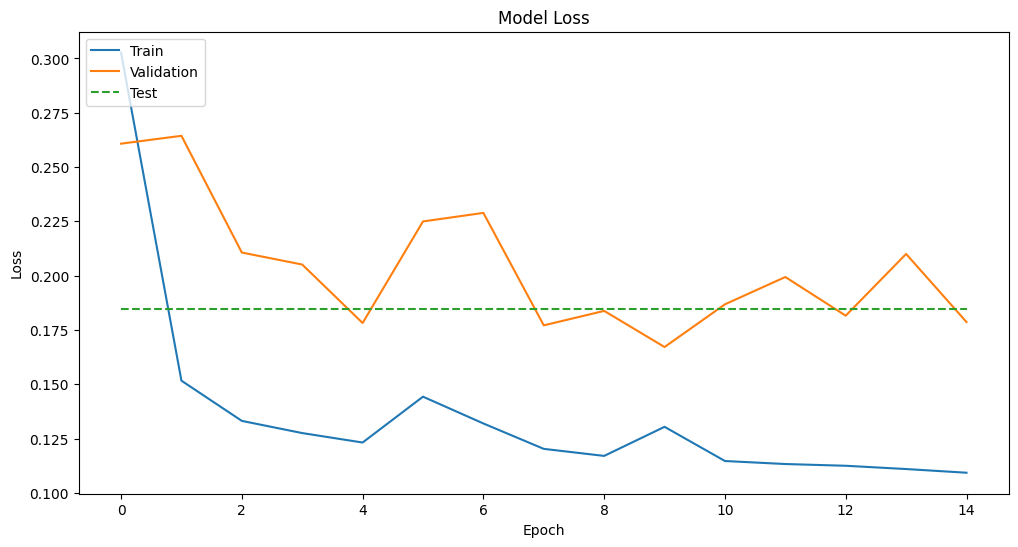

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
loss_test,accuracy_test = model.evaluate(X_test,y_test)
accuracy_plot(training,accuracy_test)
loss_plot(training,loss_test)









# ***4. Training Models***

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import f1_score


> *confusion matrix plotting*

In [ ]:
def cm_plot(y_test,clf_pred):
  confuse_matrix=confusion_matrix(y_test,clf_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=confuse_matrix)
  display.plot()


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_resampled,y_train_resampled)
dtc_pred = dtc.predict(X_test)


In [ ]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     83236
           1       1.00      1.00      1.00     11757
           2       0.98      0.99      0.99     15097
           3       0.99      0.99      0.99      7909
           4       0.94      0.97      0.95      7084

    accuracy                           0.99    125083
   macro avg       0.98      0.99      0.99    125083
weighted avg       0.99      0.99      0.99    125083



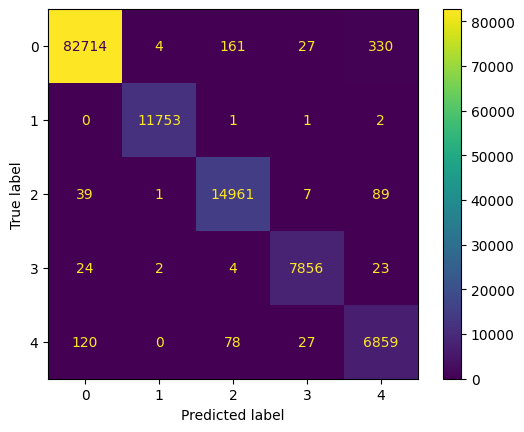

In [ ]:
cm_plot(y_test,dtc_pred)

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rdf_clf = RandomForestClassifier(random_state=0)

rdf_clf.fit(X_train_resampled,y_train_resampled)

clf_pred = rdf_clf.predict(X_test)


In [ ]:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     83236
           1       1.00      1.00      1.00     11757
           2       0.98      0.97      0.97     15097
           3       1.00      0.99      0.99      7909
           4       0.89      0.92      0.90      7084

    accuracy                           0.98    125083
   macro avg       0.97      0.97      0.97    125083
weighted avg       0.98      0.98      0.98    125083



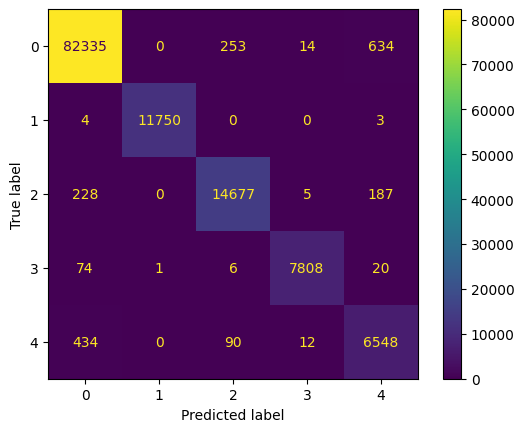

In [ ]:
cm_plot(y_test,clf_pred)

# **KNN Perfomance with different k values visualization**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier



n_neighbors = list(range(1, 16, 2))

accuracy_scores = []

precision_scores = []

recall_scores = []

f1_scores = []



for i in n_neighbors:

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train_resampled, y_train_resampled)

    knn_pred = knn.predict(X_test)



    accuracy = accuracy_score(y_test, knn_pred)

    precision = precision_score(y_test, knn_pred, average='weighted')

    recall = recall_score(y_test, knn_pred, average='weighted')

    f1 = f1_score(y_test, knn_pred, average='weighted')



    accuracy_scores.append(accuracy)

    precision_scores.append(precision)

    recall_scores.append(recall)

    f1_scores.append(f1)

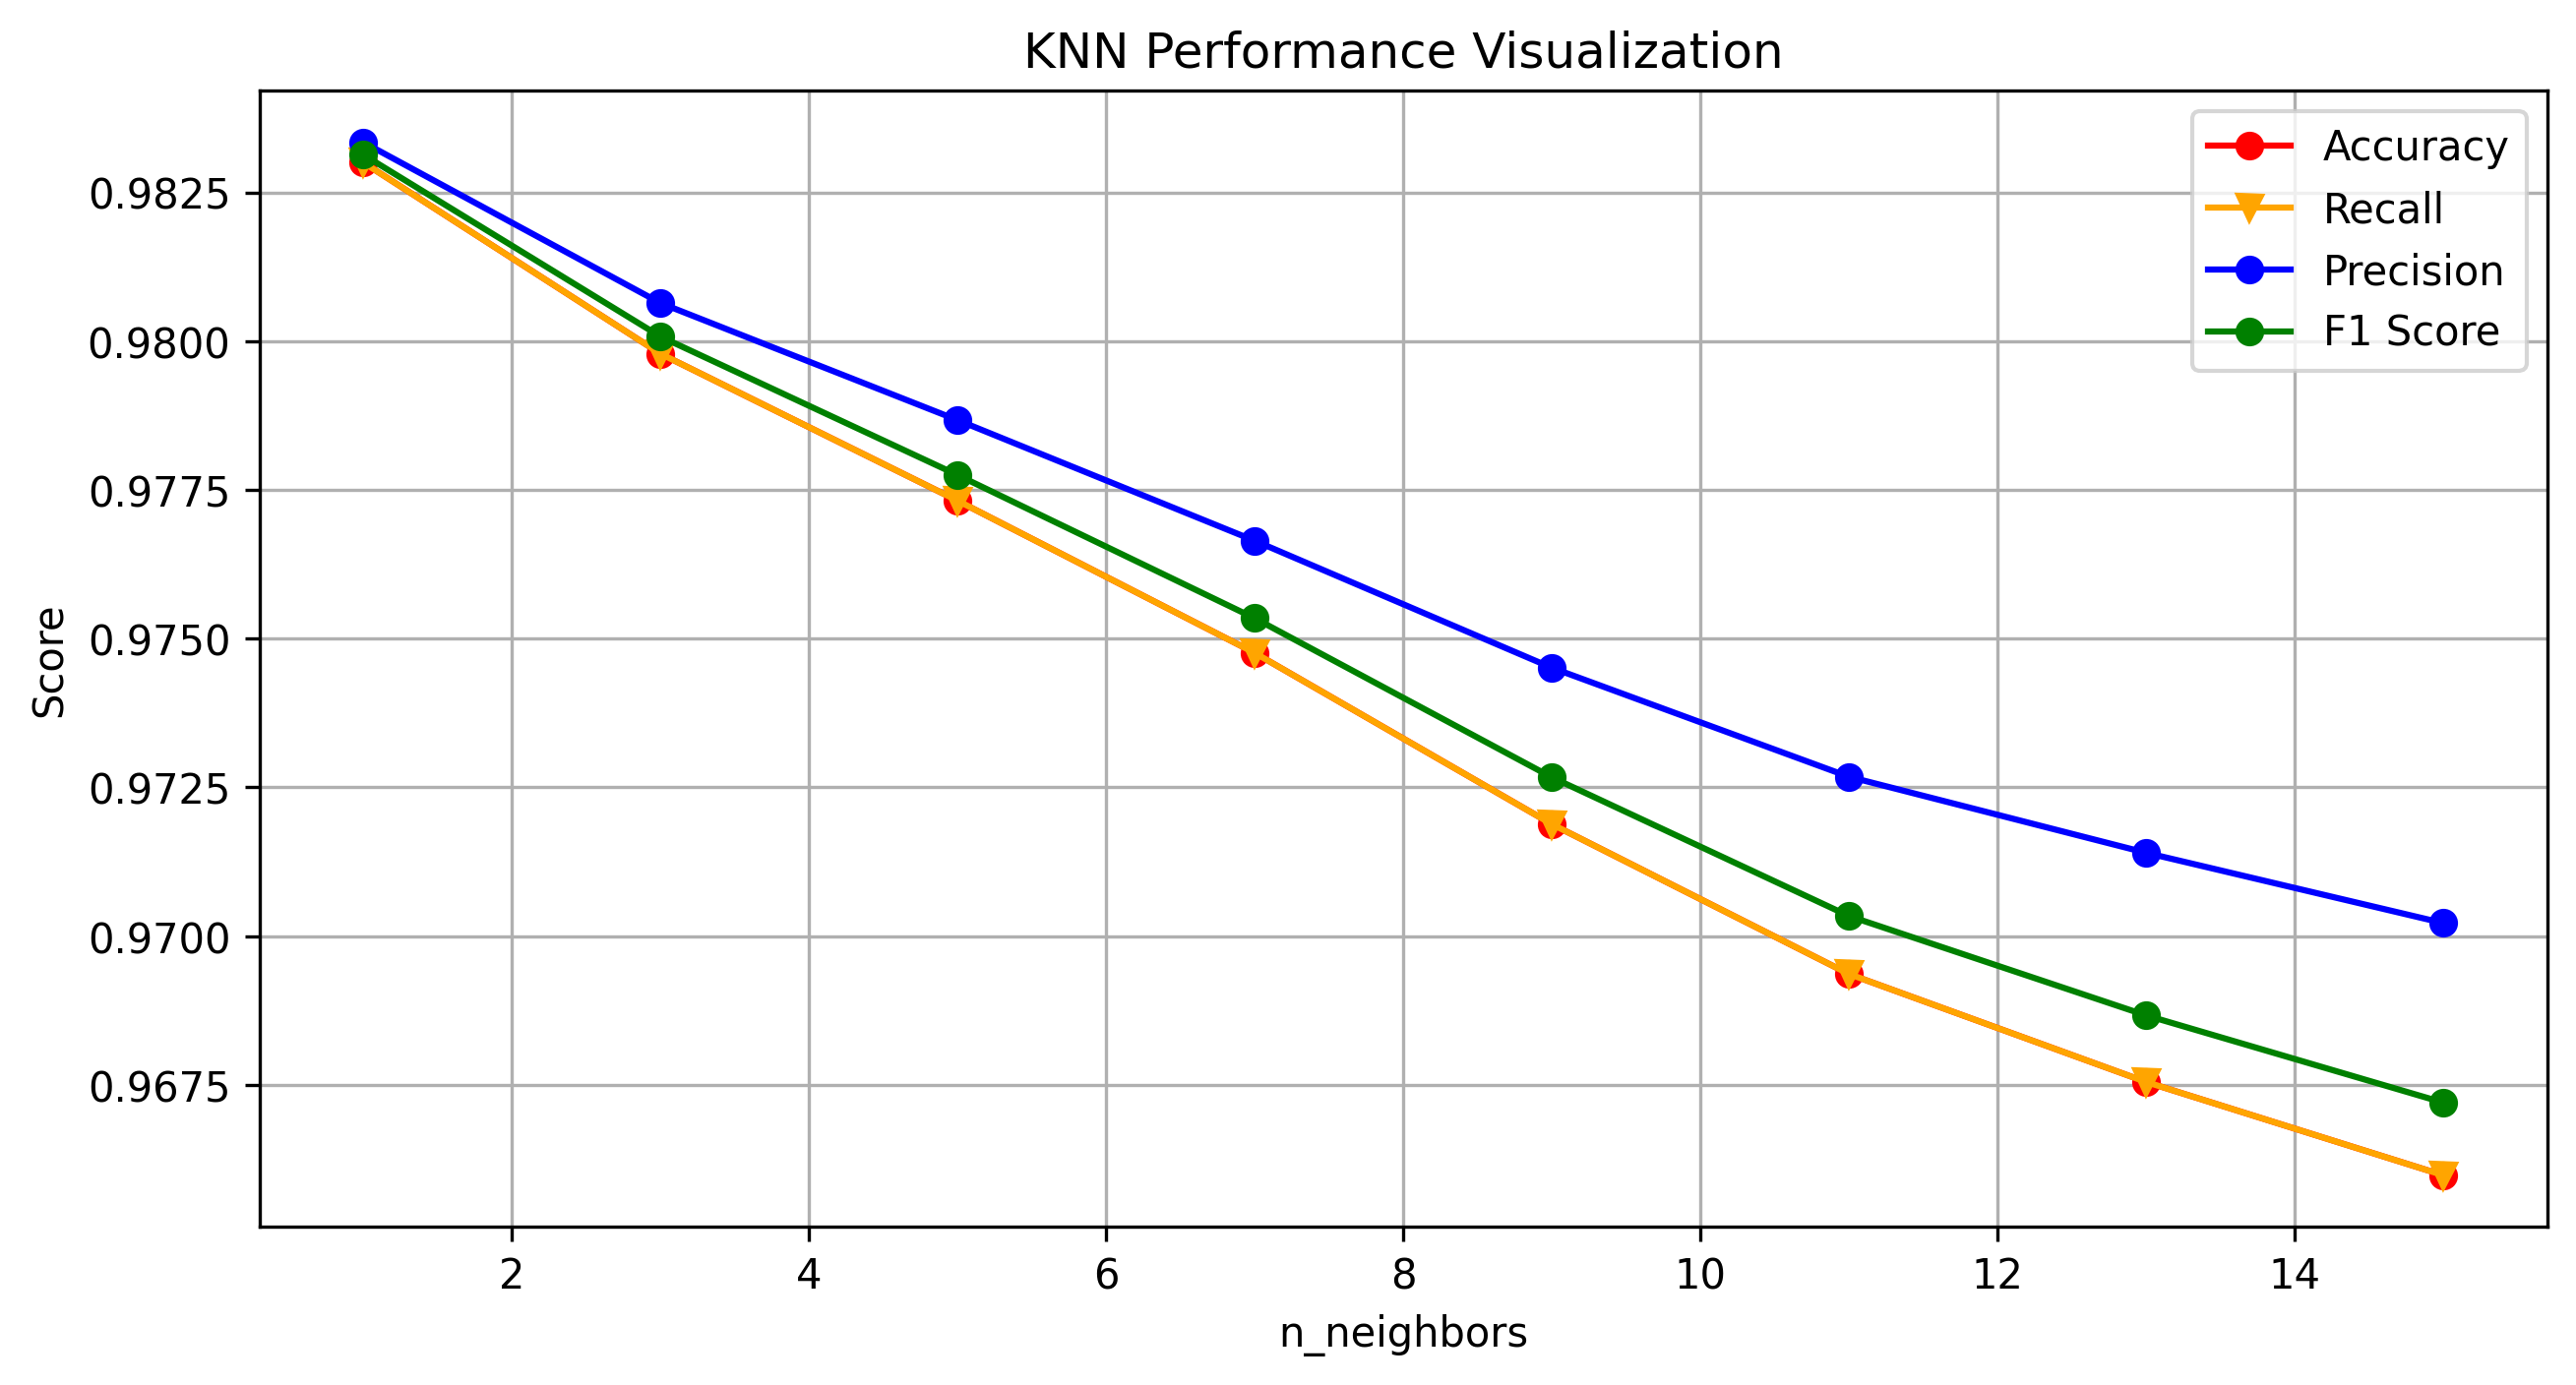

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 5), dpi=300)



plt.xlabel('n_neighbors')

plt.ylabel('Score')

plt.title('KNN Performance Visualization')



plt.plot(n_neighbors, accuracy_scores, marker='o', color='red', label='Accuracy')

plt.plot(n_neighbors, recall_scores, marker='v', color='orange', label='Recall')

plt.plot(n_neighbors, precision_scores, marker='o', color='blue', label='Precision')

plt.plot(n_neighbors, f1_scores, marker='o', color='green', label='F1 Score')







plt.legend()

plt.grid(True)

plt.savefig('knn_performance_evaluation.png',format='png',dpi=300)

plt.show()

# **Define best knn with optimal k value**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

opt_knn = KNeighborsClassifier(n_neighbors=1)

opt_knn.fit(X_train_resampled,y_train_resampled)

best_knn_pred=opt_knn.predict(X_test)


In [ ]:
print(classification_report(y_test,best_knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     83236
           1       1.00      1.00      1.00     11757
           2       0.96      0.97      0.97     15097
           3       0.99      0.99      0.99      7909
           4       0.89      0.93      0.91      7084

    accuracy                           0.98    125083
   macro avg       0.97      0.97      0.97    125083
weighted avg       0.98      0.98      0.98    125083



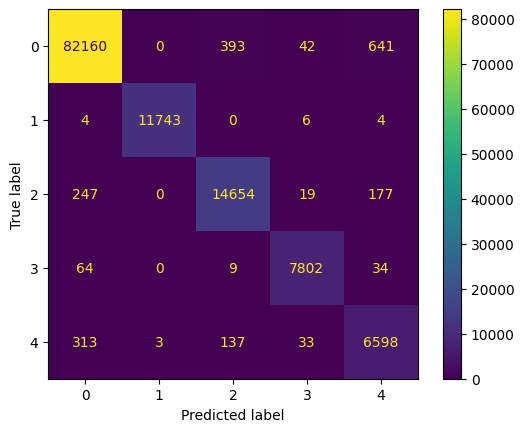

In [ ]:
cm_plot(y_test,best_knn_pred)

# ***5. Cross Validation***

* *Using cross validation to validate model performance and avoid overfitting*

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression



models ={
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=0),

    'Random Forest': RandomForestClassifier(random_state=0),
    'KNN':KNeighborsClassifier(n_neighbors=1)
}



skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)



for name,model in models.items():

  scores = cross_val_score(model,X_train_resampled,y_train_resampled,cv=skf, scoring = 'accuracy',n_jobs=-1)

  print(f"{name} cross validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")




Decision Tree Classifier cross validation accuracy: 0.9929 ± 0.0002


Random Forest cross validation accuracy: 0.9920 ± 0.0001


KNN cross validation accuracy: 0.9888 ± 0.0003


# ***6. Model Comparision***

In [ ]:
def calc(y_test,pred):
  arr = []
  arr.append(accuracy_score(y_test,pred))
  arr.append(precision_score(y_test,pred,average='weighted'))
  arr.append(recall_score(y_test,pred,average='weighted'))
  arr.append(f1_score(y_test,pred,average='weighted'))
  return arr


# **Plotting models' score with different metrics**

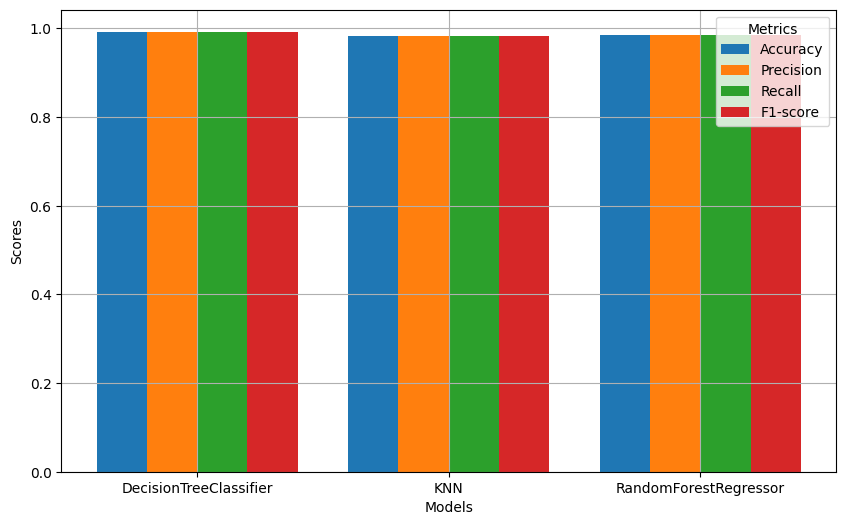

In [ ]:
import matplotlib.pyplot as plt



scores ={
    "DecisionTreeClassifier": calc(y_test,dtc_pred),
    "KNN": calc(y_test,best_knn_pred),
    "RandomForestRegressor": calc(y_test,clf_pred)
}
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

index = np.arange(len(scores))
fig,ax= plt.subplots(figsize=(10,6))
bar_width = 0.2

for i,metric in enumerate(metrics):
  values= [scores[model][i] for model in scores ]
  ax.bar(index+ i*bar_width, values, bar_width,label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_xticks(index + bar_width * (len(scores)) / 2)
ax.set_xticklabels(scores.keys())
plt.grid(True)
ax.legend(title="Metrics")
plt.show()

# **Score Summary Table**

In [ ]:
model_score ={
    'Model': ['Decision Tree Classifier','KNeighborsClassifier','RandomForestRegressor'],
    'Accuracy': [
        accuracy_score(y_test,dtc_pred),
        accuracy_score(y_test,best_knn_pred),
        accuracy_score(y_test,clf_pred)
    ],
    'Precision':[
        precision_score(y_test,dtc_pred,average='weighted'),
        precision_score(y_test,best_knn_pred,average='weighted'),
        precision_score(y_test,clf_pred,average='weighted')
    ],
    'Recall':[
        recall_score(y_test,dtc_pred,average='weighted'),
        recall_score(y_test,best_knn_pred,average='weighted'),
        recall_score(y_test,clf_pred,average='weighted')
    ],
    'F1':[
        f1_score(y_test,dtc_pred,average='weighted'),
        f1_score(y_test,best_knn_pred,average='weighted'),
        f1_score(y_test,clf_pred,average='weighted')
    ]
}

model_score_table = pd.DataFrame(model_score)
model_score_table.set_index('Model')

,Accuracy,Precision,Recall,F1
Model,,,,
Decision Tree Classifier,0.992485,0.992600,0.992485,0.992526
KNeighborsClassifier,0.983003,0.983342,0.983003,0.983133
RandomForestRegressor,0.984290,0.984545,0.984290,0.984392


# ***7. Conclusion***

*  *Decision Tree Classifier provided the best performance with the least real-time running consumed.This model effectively handled the problem, with higher metrics scoring(compared to RandomForestClassifier and KNeighborsClassifier) and better cross-validation score as well(greater mean value and lower std value),which means it outperformed and provided more stable predictions across mutiple validation folds*